<a href="https://colab.research.google.com/github/malyokhova/Physics/blob/lab-5.08/5_08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import math
import numpy as np
import pandas as pd
from statistics import mean
import matplotlib.pyplot as plt

# Упражнение 1

Расчет средних значений диаметров

In [ ]:
# D11 = [16.1, 18.0, 18.7, 20.5, 21.5, 23.1]
# D12 = [19.6, 20.4, 22.7, 23.6, 24.4, 26.8]

# D21 = [23.0, 24.8, 26.0, 27.8, 29.1, 34.7]
# D22 = [35.7, 36.5, 41.1, 42.1, 47.2, 49.7]

D21 = [16.1, 18.0, 18.7, 20.5, 21.5, 23.1]
D22 = [19.6, 20.4, 22.7, 23.6, 24.4, 26.8]

D11 = [23.0, 24.8, 26.0, 27.8, 29.1, 34.7]
D12 = [35.7, 36.5, 41.1, 42.1, 47.2, 49.7]

D1 = list(map(lambda d1, d2: round((d1 + d2) / 2, 2), D11, D12)) #мм
print('D1:', D1)
D2 = list(map(lambda d1, d2: round((d1 + d2) / 2, 2), D21, D22)) #мм
print('D2:', D2)

D1: [29.35, 30.65, 33.55, 34.95, 38.15, 42.2]
D2: [17.85, 19.2, 20.7, 22.05, 22.95, 24.95]


Рассчет теоретических значений длин волн электрона для всех значений напряжения *U*

In [ ]:
U = [5, 4.5, 4, 3.5, 3, 2.5] #кВ
wavelengths = [1.22 / math.sqrt(u * math.pow(10, 3)) * math.pow(10, 3) for u in U] #пм
print("Длина волны от U", wavelengths)

Длина волны от U [17.253405460951758, 18.186686216998293, 19.289893727027113, 20.621763815375804, 22.27405067187675, 24.4]


# Обработка результатов

## Упражнение 2

Рассчет *sin(v)*

In [ ]:
L = 130 #мм
sin_v_1 = [math.sin(0.5 * math.atan(d / (2 * L))) for d in D1]
print("sin(v1):", sin_v_1)

sin_v_2 = [math.sin(0.5 * math.atan(d / (2 * L))) for d in D2]
print("sin(v2):", sin_v_2)

sin(v1): [0.056174791012463705, 0.05863787027810389, 0.06412064507548229, 0.06676135075295014, 0.07278115788205941, 0.08036550860229122]
sin(v2): [0.03426643405548316, 0.03684783516072048, 0.03971345578787362, 0.04229000588436516, 0.04400630812150658, 0.04781605913320167]


Рассчет межплоскостного расстояния в кристаллической решетке графита

In [ ]:
d1 = list(map(lambda sin_v, wl: wl / (2 * sin_v), sin_v_1, wavelengths)) #пм
d1_mean = mean(d1)
print("Экспериментальные значения d1:", d1)
print("Среднее значение d1:", round(d1_mean, 2))

d2 = list(map(lambda sin_v, wl: wl / (2 * sin_v), sin_v_2, wavelengths)) #пм
d2_mean = mean(d2)
print("Экспериментальные значение d2:", d2)
print("Среднее значение d2:", round(d2_mean, 2))

Экспериментальные значения d1: [153.56893323487114, 155.07628543417127, 150.4187434820658, 154.44387795332722, 153.02072212131785, 151.80641810375076]
Среднее значение d1: 153.06
Экспериментальные значение d2: [251.75373417927838, 246.78093214530506, 242.86344948249533, 243.81367871835386, 253.07792930931043, 255.1444058995815]
Среднее значение d2: 248.91


Погрешность в расчетах межплоскостных расстояний

In [ ]:
L = 130
dL = 2
# d = math.sqrt(math.pow(dL/L, 2)) а зачем возводить в квадрат, а потом корень из этого брать?
d = dL / L
# print("Погрешность в рассчетах межплоскостных расстояний: ", d)

d1_theor = 123 # пм
d2_theor = 213 # пм

d1_meas_err = [(d1_ - d1_theor) / d1_theor * 100 for d1_ in d1] # %
d2_meas_err = [(d2_ - d2_theor) / d2_theor * 100 for d2_ in d2] # %

print(d1_meas_err)
print(d2_meas_err)

d1_mean_meas_err = (d1_mean - d1_theor) / d1_theor * 100 # %
d2_mean_meas_err = (d2_mean - d2_theor) / d2_theor * 100 # %

print(d1_mean_meas_err)
print(d2_mean_meas_err)

[24.852791247862715, 26.078280840789645, 22.291661367533163, 25.564128417339198, 24.407091155542965, 23.419852116870533]
[18.194241398722244, 15.859592556481248, 14.020398818072923, 14.466515830213078, 18.815929253197385, 19.78610605614155]
24.435634190989717
16.857130652138075


## Упражнение 3

Рассчет длины волны де-Бройля по теоретическим значениям плоскостного расстояния в кристаллической решетке графита и по раннее рассчитанному значению угла скольжения

In [ ]:
# wavelenghts1 = list(map(lambda sin_v, d: 2 * d * sin_v * math.pow(10, -3), sin_v_1, d1))
# wavelenghts2 = list(map(lambda sin_v, d: 2 * d * sin_v * math.pow(10, -3), sin_v_2, d2))

wavelengths_1 = [2 * d1_theor * sin_v for sin_v in sin_v_1] # пм
wavelengths_2 = [2 * d2_theor * sin_v for sin_v in sin_v_2] # пм

log_wavelengths_1 = [math.log(wl * math.pow(10, -12)) for wl in wavelengths_1]
log_wavelengths_2 = [math.log(wl * math.pow(10, -12)) for wl in wavelengths_2]

print("Длина волны 1: ", wavelengths_1)
print("Длина волны 2: ", wavelengths_2)
print("Логарифм длины волны 1: ", log_wavelengths_1)
print("Логарифм длины волны 2: ", log_wavelengths_2)

Длина волны 1:  [13.818998589066071, 14.424916088413557, 15.773678688568644, 16.423292285225735, 17.904164838986617, 19.76991511616364]
Длина волны 2:  [14.597500907635826, 15.697177778466925, 16.917932165634163, 18.01554250673956, 18.746687259761803, 20.369641190743913]
Логарифм длины волны 1:  [-25.004976761208223, -24.962064120645685, -24.87267847084649, -24.832320527421274, -24.745987757576817, -24.646859772323086]
Логарифм длины волны 2:  [-24.95017077257551, -24.877540179066248, -24.80264698165199, -24.739786258013744, -24.700004058601156, -24.61697550043781]


Рассчет теоретического значения импульса электронов *p*

In [ ]:
me = 9.1 * math.pow(10, -31)
e = 1.6 * math.pow(10, -19)

p = [math.sqrt(2 * me * e * u * 1000) for u in U]
log_p = [math.log(p_) for p_ in p]

print("Импульс: ", p)
print("Логарифм импульса: ", log_p)

Импульс:  [3.815756805667783e-23, 3.619944750959606e-23, 3.412916641232247e-23, 3.192491190277587e-23, 2.955672512305787e-23, 2.6981475126464084e-23]
Логарифм импульса:  [-51.62031811747878, -51.67299837530769, -51.731889893135886, -51.798655589448146, -51.87573092936178, -51.966891707758755]


Определение постоянной Планка

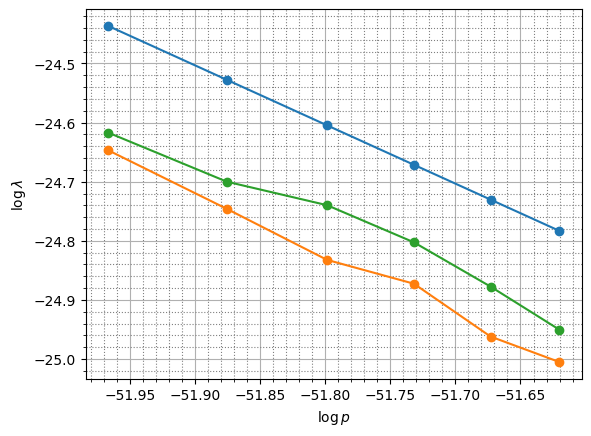

-76.40332969138815
6.583479930857197e-34
0.35710301386449295
0.3957616556189518
-0.6417155017024321


In [ ]:
log_wavelengths = [math.log(wl * math.pow(10, -12)) for wl in wavelengths]
log_wavelengths_1 = [math.log(wl * math.pow(10, -12)) for wl in wavelengths_1]
log_wavelengths_2 = [math.log(wl * math.pow(10, -12)) for wl in wavelengths_2]

plt.minorticks_on()
plt.grid(True, which='both')
plt.grid(which='minor', color='gray', linestyle=':')

plt.plot(log_p, log_wavelengths, 'o-')
plt.plot(log_p, log_wavelengths_1, 'o-')
plt.plot(log_p, log_wavelengths_2, 'o-')

# a_1, b_1 = np.polyfit(log_p, log_wavelengths_1, 1) это я додумаю на досуге
# a_2, b_2 = np.polyfit(log_p, log_wavelengths_2, 1)

plt.xlabel(r'$\log p$')
plt.ylabel(r'$\log \lambda$')
plt.show()

log_h = log_wavelengths[0] + log_p[0]
h = math.exp(log_h)
# h_1 = math.exp(log_h_1) это тоже
# h_2 = math.exp(log_h_2)
print(log_h)
print(h)
# print(h_1)
# print(h_2)

h_real = 6.626 * math.pow(10, -34)
print((h - h_real) / h_real * 100)

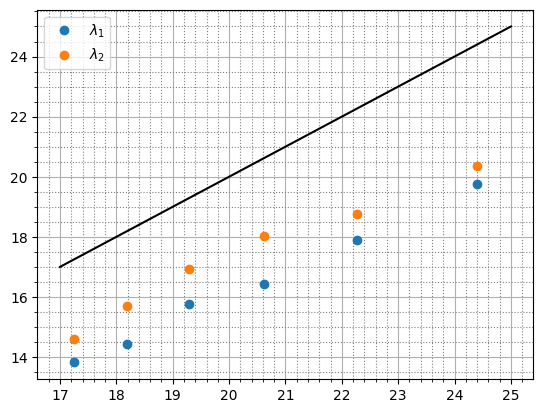

In [ ]:
plt.minorticks_on()
plt.grid(True, which='both')
plt.grid(which='minor', color='gray', linestyle=':')

x = np.linspace(17, 25, 50)
y = x

plt.plot(x, y, color='black')

plt.plot(wavelengths, wavelengths_1, 'o', label=r'$\lambda_1$')
plt.plot(wavelengths, wavelengths_2, 'o', label=r'$\lambda_2$')
plt.legend()
plt.show()